# Source: UGM 2012 material

#### Quick overview of fingerprints: https://www.rdkit.org/UGM/2012/Landrum_RDKit_UGM.Fingerprints.Final.pptx.pdf

## 1. Maximum Common Substructure (MCS)

In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import MCS

/home/mandar/anaconda3/envs/my-rdkit-env_py37/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: The rdkit.Chem.MCS module is deprecated; please use rdkit.Chem.rdFMCS instead.
  after removing the cwd from sys.path.


In [2]:
smi_1 = ("CC(=O)C1=CC=C2SC3=C(C=CC=C3)N(CCCN3CCN(CCO)CC3)C2=C1", \
         "CC(=O)C1=CC=C2SC3=C(C=CC=C3)N(CCCN3CCN(CCO)CC3)C2=C1",\
         "CCC(=O)C1=CC2=C(SC3=CC=CC=C3N2CC(C)N(C)C)C=C1", \
         "CN(C)CCCN1C2=CC=CC=C2SC2=C1C=C(C=C2)C(F)(F)F", \
         "CC(CN(C)C)CN1C2=CC=CC=C2SC2=CC=CC=C12", \
         "OC1CCN(CCCN2C3=CC=CC=C3SC3=C2C=C(C=C3)C#N)CC1" )

In [3]:
## Convert SMILES2MOL
mol_1 = [Chem.MolFromSmiles(x) for x in smi_1]

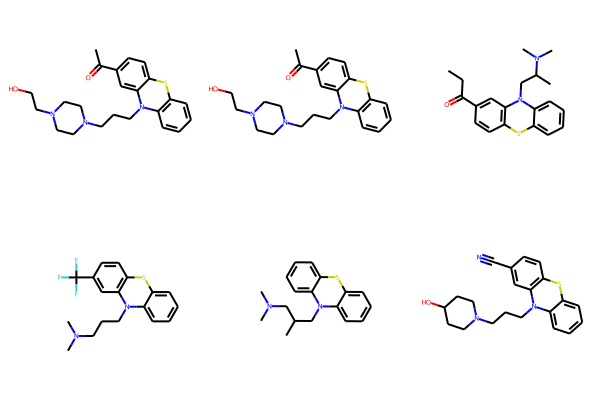

In [4]:
Draw.MolsToGridImage(mol_1)

In [5]:
## Getting MCS
mcs=MCS.FindMCS(mol_1)
mcs

/home/mandar/anaconda3/envs/my-rdkit-env_py37/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The rdkit.Chem.MCS module is deprecated; please use rdkit.Chem.rdFMCS instead.
  


MCSResult(numAtoms=17, numBonds=19, smarts='[#6]-[#6]-[#6]-[#7]-1-[#6]:2:[#6]:[#6]:[#6]:[#6]:[#6]:2-[#16]-[#6]:2:[#6]:[#6]:[#6]:[#6]:[#6]-1:2', completed=1)

In [6]:
from rdkit.Chem import rdFMCS

In [7]:
mcs1 = rdFMCS.FindMCS(mol_1)
mcs1

In [8]:
mcs1.smartsString

'[#6]-[#6]-[#6]-[#7]1-[#6]2:[#6]:[#6]:[#6]:[#6]:[#6]:2-[#16]-[#6]2:[#6]-1:[#6]:[#6]:[#6]:[#6]:2'

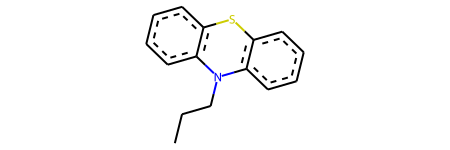

In [9]:
#visualuze smarts.string
Chem.MolFromSmarts(mcs.smarts)

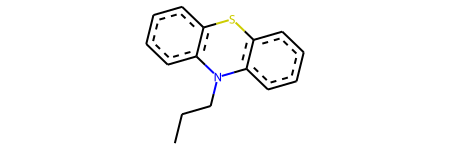

In [10]:
Chem.MolFromSmarts(mcs1.smartsString)

## MCS.FindMCS and rdFMCS.FindMCS both give the same answer!!

# 2. Matched Molecular Pairs (MMP) Very important

### See nice slides here: https://www.rdkit.org/UGM/2012/Evans_Papadatos_RDKit_UGM.pdf

## Expand this section more later !!!
https://www.rdkit.org/UGM/2012/Evans_Papadatos_RDKit_UGM.pdf

In [1]:
# Follow this for MMPA
# https://github.com/rdkit/rdkit/tree/master/Contrib/mmpa

In [2]:

### Read more and try to do this: https://pubs.acs.org/doi/pdf/10.1021/acsomega.7b01194

# 3. BRICS and RECAP
## BRICS: Breaking Retrosynthetically Interesting Chemical Substructures 
### Ref 1: Lewell, X. Q., Judd, D. B., Watson, S. P. & Hann, M. M. RECAP - Retrosynthetic Combinatorial Analysis Procedure: A Powerful New Technique for Identifying Privileged Molecular Fragments with Useful Applications in Combinatorial Chemistry. JCICS 38, 511–512 (1998).

## with BRICS we can build new molecules from fragments!!!

## RECAP: REtrosynthetic Combinatorial Analysis Procedure
### Ref 2: Degen, J., Wegscheid-Gerlach, C., Zaliani, A. & Rarey, M. On the Art of Compiling and Using ‘Drug-Like’ Chemical Fragment Spaces. ChemMedChem 3, 1503–1507 (2008).

##### More Reading:
#### 1. https://pubs.acs.org/doi/pdf/10.1021/acs.jcim.6b00596
#### 2. https://onlinelibrary.wiley.com/doi/epdf/10.1111/cbdd.13129

In [13]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import Recap,BRICS

In [14]:
cdk2mols = [x for x in Chem.SDMolSupplier('data/cdk2.sdf') if x is not None]

RDKit ERROR: [11:44:31] Explicit valence for atom # 19 C greater than permitted
[11:44:31] Explicit valence for atom # 19 C greater than permitted
[11:44:31] ERROR: Could not sanitize molecule ending on line 2839
RDKit ERROR: [11:44:31] ERROR: Could not sanitize molecule ending on line 2839


In [15]:
for m in cdk2mols: AllChem.Compute2DCoords(m)

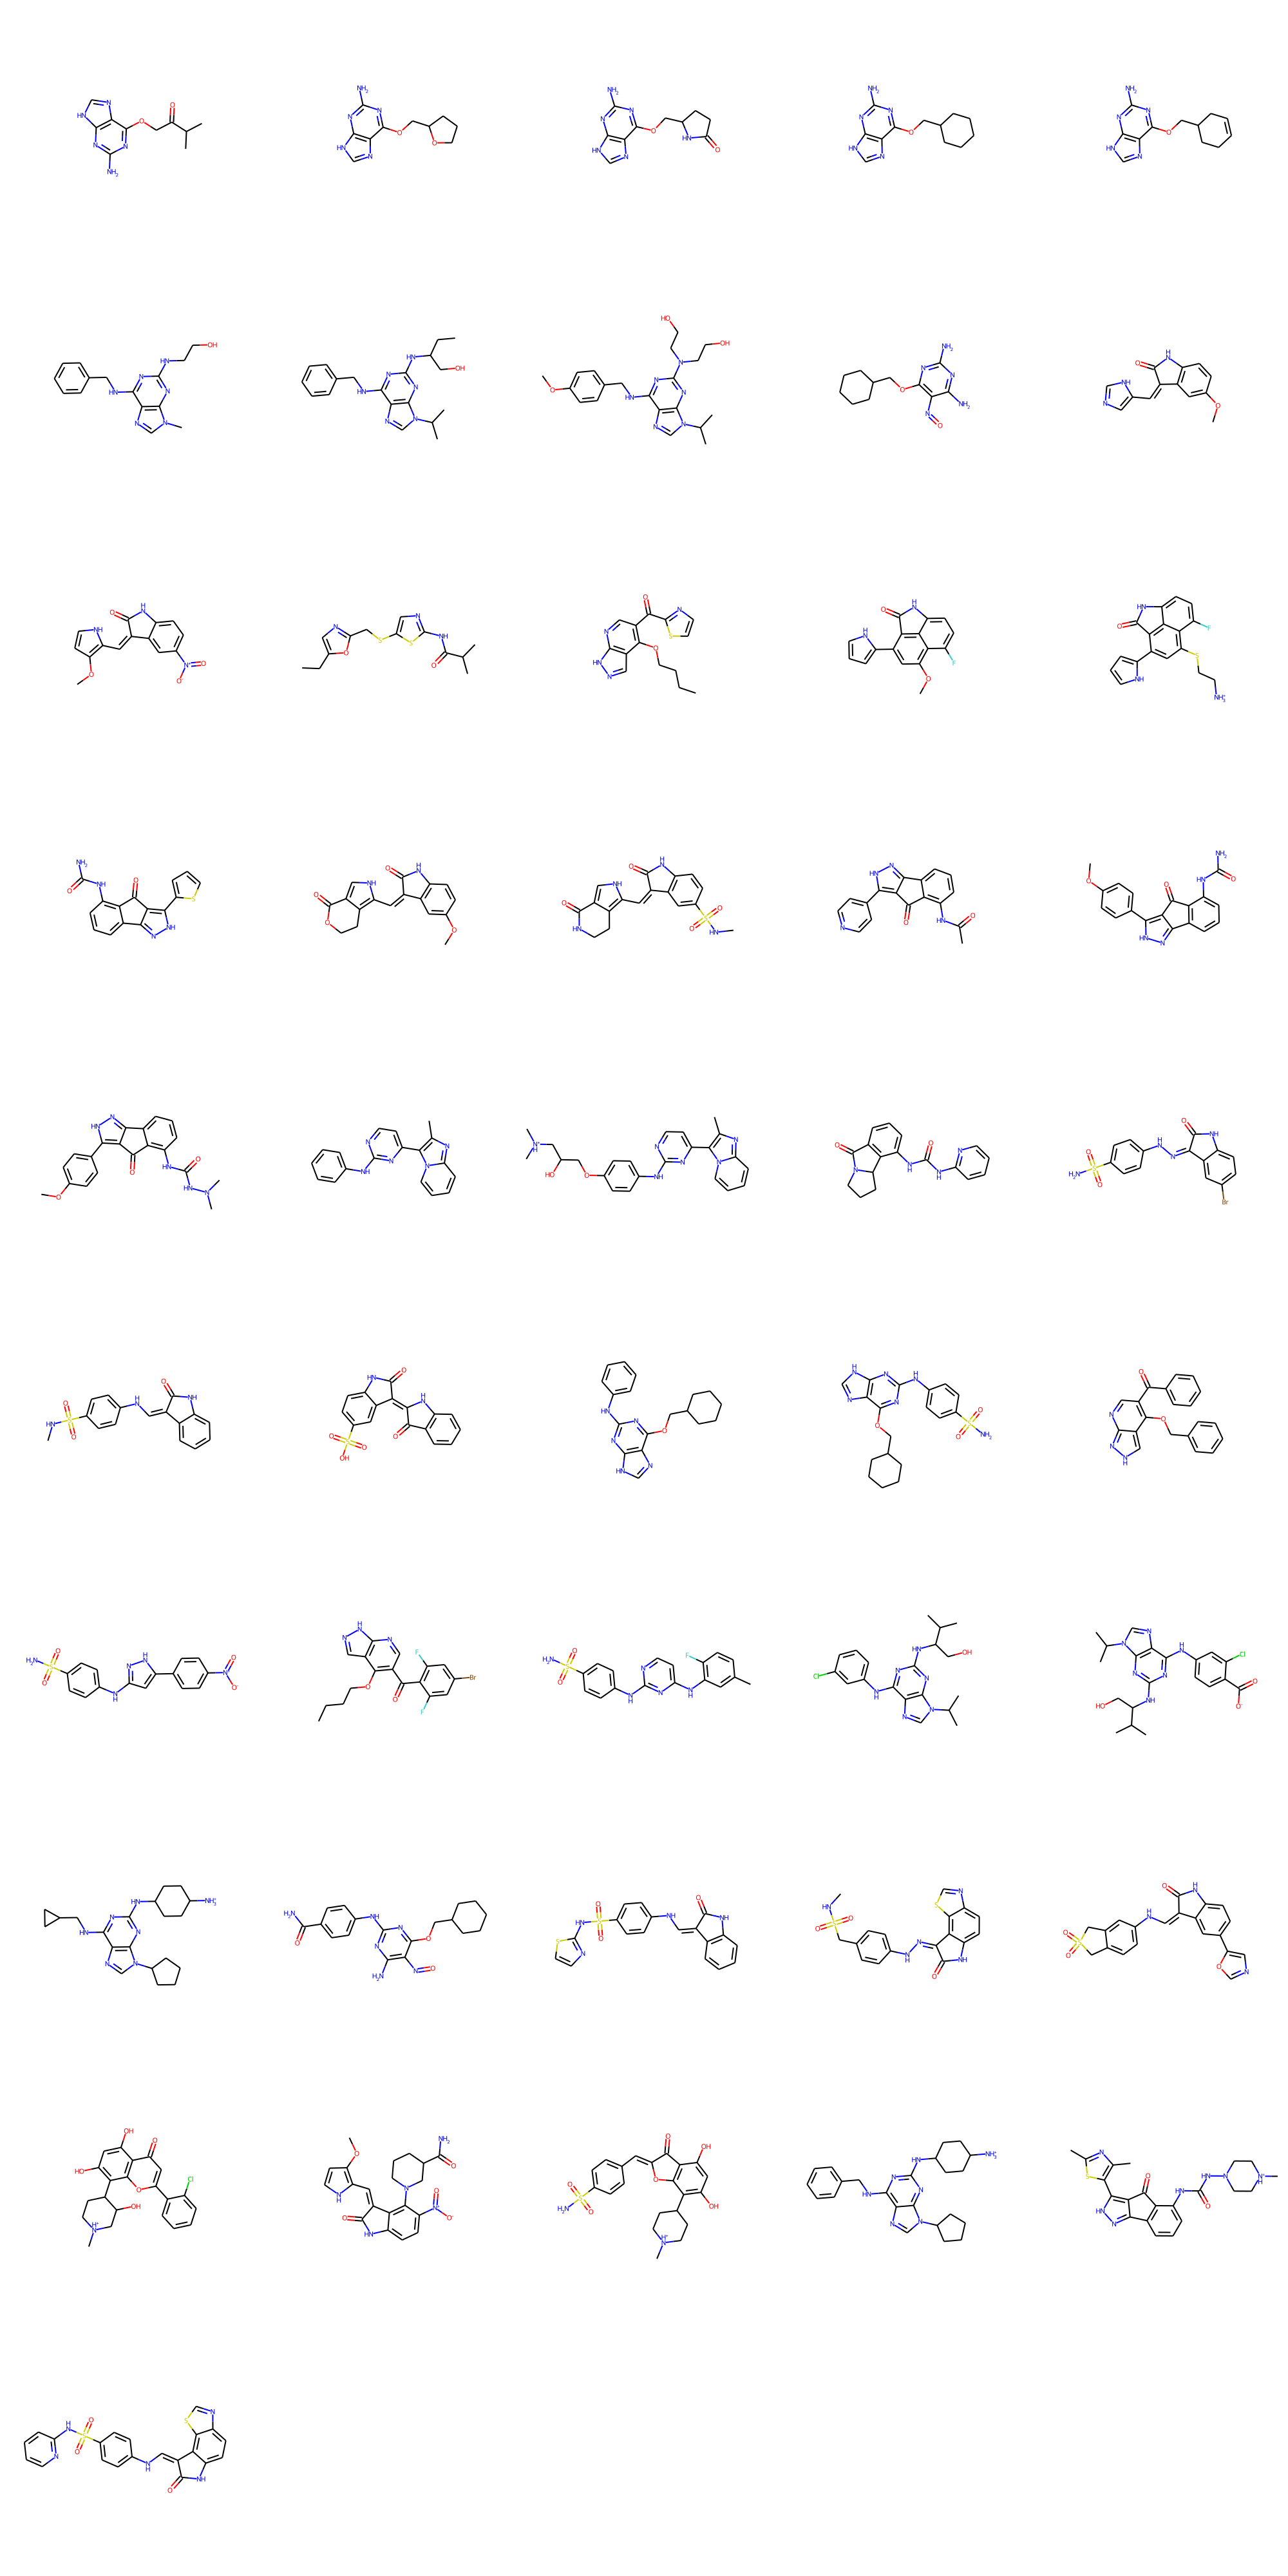

In [16]:
Draw.MolsToGridImage(cdk2mols, molsPerRow=5, subImgSize=(400, 400))

In [17]:
### SDF to smiles

for m in cdk2mols: 
    AllChem.Compute2DCoords(m)

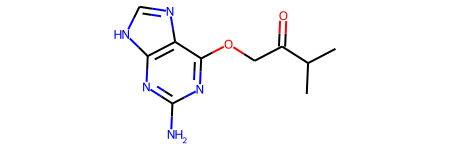

In [18]:
m1 = cdk2mols[0]
m1

# This is fragment decomposition step!

In [19]:
pieces = BRICS.BRICSDecompose(m1)

In [20]:
pieces

{'[14*]c1nc(N)nc2[nH]cnc12', '[3*]O[3*]', '[4*]CC(=O)C(C)C'}

In [21]:
list(pieces)[0]

'[3*]O[3*]'

In [22]:
len(pieces)

3

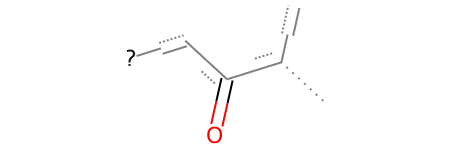

In [23]:
Chem.MolFromSmarts(list(pieces)[1])

# RECAP and BRICS.ipynb finish this!!

# Now breaking all smiles!!

In [25]:
allfrags=set() ## Remember this is se
for m in cdk2mols:
    pieces = BRICS.BRICSDecompose(m)
    allfrags.update(pieces)
allfrags

{'NS(=O)(=O)c1ccc(N/N=C2\\C(=O)Nc3ccc(Br)cc32)cc1',
 '[1*]C(=O)C(C)C',
 '[1*]C(=O)NN(C)C',
 '[1*]C(=O)NN1CC[NH+](C)CC1',
 '[1*]C(C)=O',
 '[1*]C(N)=O',
 '[1*]C([1*])=O',
 '[11*]S[11*]',
 '[12*]S(=O)(=O)c1ccc([16*])cc1',
 '[13*]C1CCC(=O)N1',
 '[13*]C1CCCO1',
 '[14*]c1[nH]cc2c1CCNC2=O',
 '[14*]c1[nH]cc2c1CCOC2=O',
 '[14*]c1[nH]ccc1[16*]',
 '[14*]c1[nH]nc2c1C(=O)c1c([16*])cccc1-2',
 '[14*]c1c(C)nc2ccccn12',
 '[14*]c1cc(=O)c2c(O)cc(O)c([16*])c2o1',
 '[14*]c1cc([14*])[nH]n1',
 '[14*]c1ccc[nH]1',
 '[14*]c1ccccn1',
 '[14*]c1cccs1',
 '[14*]c1ccnc([14*])n1',
 '[14*]c1cnc([14*])o1',
 '[14*]c1cnc([14*])s1',
 '[14*]c1cnc[nH]1',
 '[14*]c1cnco1',
 '[14*]c1nc(N)nc(N)c1N=O',
 '[14*]c1nc(N)nc2[nH]cnc12',
 '[14*]c1nc([14*])c(N=O)c(N)n1',
 '[14*]c1nc([14*])c2nc[nH]c2n1',
 '[14*]c1nc([14*])c2ncn(C)c2n1',
 '[14*]c1nccs1',
 '[14*]c1sc(C)nc1C',
 '[15*]C1CC1',
 '[15*]C1CC=CCC1',
 '[15*]C1CCC([NH3+])CC1',
 '[15*]C1CCCC1',
 '[15*]C1CCCCC1',
 '[15*]C1CC[NH+](C)CC1',
 '[15*]C1CC[NH+](C)CC1O',
 '[16*]c1c(F)cc(Br)cc

In [26]:
len(allfrags)

89

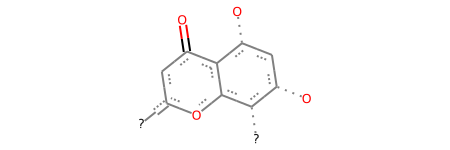

In [31]:
Chem.MolFromSmarts(list(allfrags)[87])

In [32]:
len(cdk2mols)

46

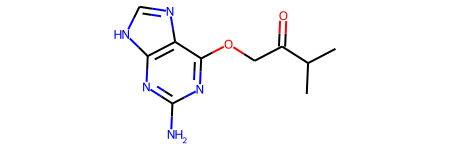

In [33]:
m = Chem.Mol(cdk2mols[0].ToBinary())
m

If you are interested in the final pieces from a BRICS decomposition, it is more efficient to use BRICS.BreakBRICSBonds().

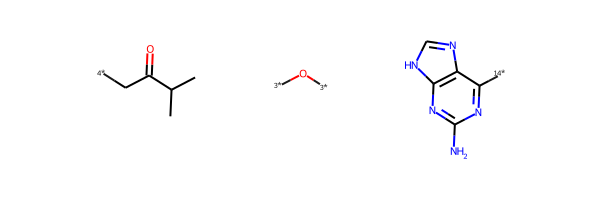

In [34]:
fragmented=BRICS.BreakBRICSBonds(m)
pieces=Chem.GetMolFrags(fragmented,asMols=True)
Draw.MolsToGridImage(pieces)

# Using BRICS to build molecules
-----

In [46]:
import random
random.seed(127)

fragms = [Chem.MolFromSmiles(x) for x in allfrags]
ms = BRICS.BRICSBuild(fragms)

In [47]:
ms

<generator object BRICSBuild at 0x7fe91e4a8ad0>

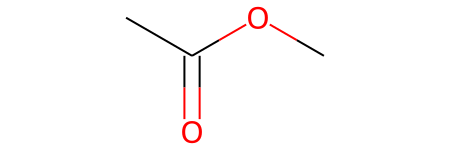

In [49]:
## This is different from UGM 2012 material
## in Python 3 , it is next(ms) now!!

next(ms)

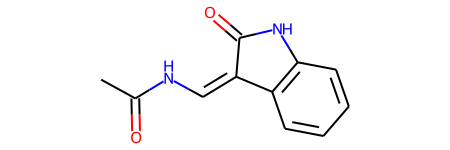

In [50]:
next(ms)

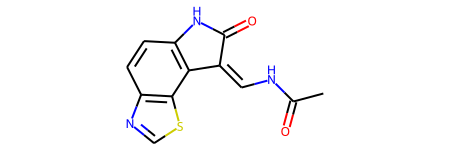

In [51]:
next(ms)

## Generating 10000 molecules
## This analysis returns return  `rdkit.Chem.rdchem.Mol` objects on success
## use print(Chem.MolToSmiles(prods[x][1])) to get SMILES!

In [141]:
prods = [next(ms) for x in range(10000)]

In [142]:
prods = [(x.GetNumAtoms(),x) for x in prods]

In [143]:
len(prods)

10000

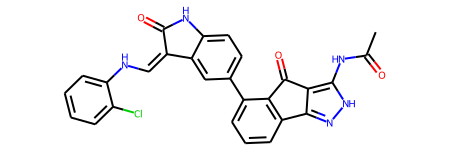

In [145]:
prods[9999][1]

In [146]:
prods[44][0] 

29

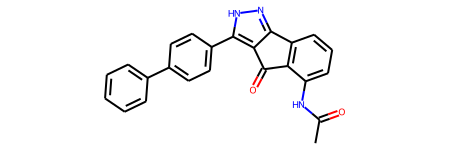

In [147]:
prods[44][1] 

## Different from UGM 2012 material
## Here we are reverse sorting (high atomnums to low atomnums) based on atomnums\
## This will give us better molecules!!

In [148]:
prods.sort(key=lambda x: x[0], reverse=True)

In [149]:
len(prods)

10000

In [150]:
prods[:5]

[(52, <rdkit.Chem.rdchem.Mol at 0x7fe9122110f0>),
 (51, <rdkit.Chem.rdchem.Mol at 0x7fe9122bc3f0>),
 (51, <rdkit.Chem.rdchem.Mol at 0x7fe91216ce10>),
 (51, <rdkit.Chem.rdchem.Mol at 0x7fe9121ab930>),
 (50, <rdkit.Chem.rdchem.Mol at 0x7fe9120e2030>)]

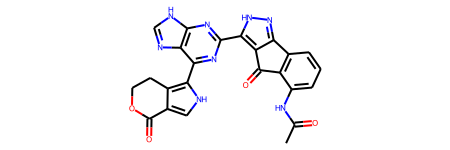

In [151]:
prods[444][1]

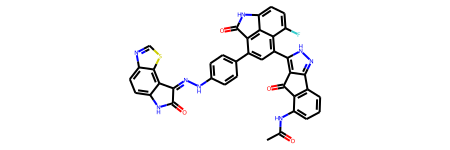

In [152]:
prods[0][1]

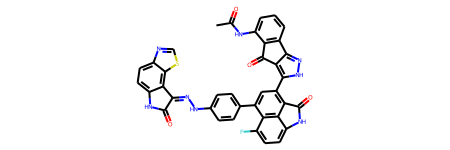

In [117]:
prods[0][1]

In [155]:
for i in range(10):
    print(Chem.MolToSmiles(prods[i][1])) # [0][1] to index out the rdchem mol object

CC(=O)Nc1cccc2c1C(=O)c1c-2n[nH]c1-c1cc(-c2ccc(N/N=C3\C(=O)Nc4ccc5ncsc5c43)cc2)c2c3c(ccc(F)c13)NC2=O
CC(=O)Nc1cccc2c1C(=O)c1c-2n[nH]c1-c1cccc2c1C(=O)c1c-2n[nH]c1-c1ccc(N/N=C2\C(=O)Nc3ccc4ncsc4c32)cc1
CC(=O)Nc1ccc2c(c1)/C(=C/Nc1cc(-c3ccc(N/N=C4\C(=O)Nc5ccc6ncsc6c54)cc3)c3c4c(ccc(F)c14)NC3=O)C(=O)N2
CC(=O)Nc1ccc2c(c1)/C(=C/Nc1cc(-c3ccc(N/N=C4\C(=O)Nc5ccc6ncsc6c54)cc3)c3c(F)ccc4c3c1C(=O)N4)C(=O)N2
CC(=O)Nc1ccc2c(c1)/C(=C/Nc1cccc3c1C(=O)c1c-3n[nH]c1-c1ccc(N/N=C3\C(=O)Nc4ccc5ncsc5c43)cc1)C(=O)N2
CC(=O)Nc1ccc2c(c1)/C(=C/Nc1c(O)cc(O)c3c(=O)cc(-c4ccc(N/N=C5\C(=O)Nc6ccc7ncsc7c65)cc4)oc13)C(=O)N2
CC(=O)Nc1ccc2c(c1)/C(=C/Nc1cc(=O)c3c(O)cc(O)c(-c4ccc(N/N=C5\C(=O)Nc6ccc7ncsc7c65)cc4)c3o1)C(=O)N2
CC(=O)Nc1ccc2c(c1)/C(=C/Nc1[nH]nc3c1C(=O)c1c(-c4ccc(N/N=C5\C(=O)Nc6ccc7ncsc7c65)cc4)cccc1-3)C(=O)N2
CC(=O)Nc1[nH]nc2c1C(=O)c1c(-c3ccc4c(c3)/C(=C/Nc3ccc(N/N=C5\C(=O)Nc6ccc7ncsc7c65)cc3)C(=O)N4)cccc1-2
CC(=O)Nc1ccc2c(c1)/C(=C/Nc1ccc3c(c1)/C(=C/Nc1ccc(N/N=C4\C(=O)Nc5ccc6ncsc6c54)cc1)C(=O)N3)C(=O)N2


# RECAP

In [157]:
m = cdk2mols[35]

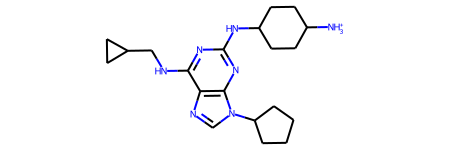

In [158]:
m

In [159]:
pieces = Recap.RecapDecompose(m)
pieces

In [160]:
pieces.children

{'*C1CCC([NH3+])CC1': <rdkit.Chem.Recap.RecapHierarchyNode at 0x7fe91228bb50>,
 '*c1nc(NCC2CC2)c2ncn(C3CCCC3)c2n1': <rdkit.Chem.Recap.RecapHierarchyNode at 0x7fe91228be50>,
 '*CC1CC1': <rdkit.Chem.Recap.RecapHierarchyNode at 0x7fe91228bf50>,
 '*c1nc(NC2CCC([NH3+])CC2)nc2c1ncn2C1CCCC1': <rdkit.Chem.Recap.RecapHierarchyNode at 0x7fe912271e50>,
 '*C1CCCC1': <rdkit.Chem.Recap.RecapHierarchyNode at 0x7fe912271cd0>,
 '*n1cnc2c(NCC3CC3)nc(NC3CCC([NH3+])CC3)nc21': <rdkit.Chem.Recap.RecapHierarchyNode at 0x7fe91229f9d0>}

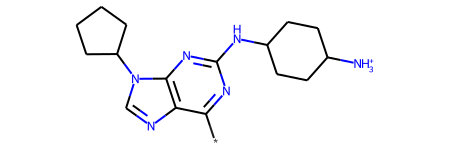

In [163]:
Chem.MolFromSmiles('*c1nc(NC2CCC([NH3+])CC2)nc2c1ncn2C1CCCC1')

In [166]:
pieces.children['*c1nc(NC2CCC([NH3+])CC2)nc2c1ncn2C1CCCC1'].children

{'*C1CCC([NH3+])CC1': <rdkit.Chem.Recap.RecapHierarchyNode at 0x7fe91228bb50>,
 '*c1nc(*)c2ncn(C3CCCC3)c2n1': <rdkit.Chem.Recap.RecapHierarchyNode at 0x7fe91229fe90>,
 '*C1CCCC1': <rdkit.Chem.Recap.RecapHierarchyNode at 0x7fe912271cd0>,
 '*c1nc(NC2CCC([NH3+])CC2)nc2c1ncn2*': <rdkit.Chem.Recap.RecapHierarchyNode at 0x7fe91228be90>}

In [167]:
pieces.children['*C1CCC([NH3+])CC1'].parents

{'[NH3+]C1CCC(Nc2nc(NCC3CC3)c3ncn(C4CCCC4)c3n2)CC1': <rdkit.Chem.Recap.RecapHierarchyNode at 0x7fe912249d10>,
 '*c1nc(NC2CCC([NH3+])CC2)nc2c1ncn2C1CCCC1': <rdkit.Chem.Recap.RecapHierarchyNode at 0x7fe912249650>,
 '*n1cnc2c(NCC3CC3)nc(NC3CCC([NH3+])CC3)nc21': <rdkit.Chem.Recap.RecapHierarchyNode at 0x7fe9122bf710>,
 '*c1nc(NC2CCC([NH3+])CC2)nc2c1ncn2*': <rdkit.Chem.Recap.RecapHierarchyNode at 0x7fe916550650>}

In [168]:
pieces.GetLeaves()

{'*C1CCC([NH3+])CC1': <rdkit.Chem.Recap.RecapHierarchyNode at 0x7fe91228bb50>,
 '*CC1CC1': <rdkit.Chem.Recap.RecapHierarchyNode at 0x7fe91228bf50>,
 '*C1CCCC1': <rdkit.Chem.Recap.RecapHierarchyNode at 0x7fe912271cd0>,
 '*c1nc(*)c2ncn(*)c2n1': <rdkit.Chem.Recap.RecapHierarchyNode at 0x7fe913850610>}